# AUTHOR: RAHIL SHAH



### DATA SCIENCE AND BUSINESS ANALYTICS INTERN



### TASK 6: PREDICTION USING DECISION TREE ALGORITHM



### GRIP - THE SPARKS FOUNDATION



### For the given 'iris' dataset, create the decision tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it will be able to predict the right class accordingly.

In [1]:
#importing the libraries
import pandas as pd                         #To work with data frames
import numpy as np                          #To perform numerical operation
import matplotlib.pyplot as plt             #For plotting graphs
import seaborn as sns                       #To visualize data

# Loading the iris dataset

In [3]:
iris_data = pd.read_csv('C:/Users/Rahil/Documents/Internship/TSF/Iris.csv')
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# Creating a copy


### It is necessary to create a copy of original data so that it remains unaffected

In [4]:
iris = iris_data.copy()

# The structure of data

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Summarizing the data

In [6]:
iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [7]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris.shape

(150, 6)

In [10]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
iris.dtypes.value_counts()

float64    4
int64      1
object     1
dtype: int64

# Checking for missing values

In [12]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### It has been observed that there are no missing values in the data.

# Checking relation of petal and sepal using pairplot

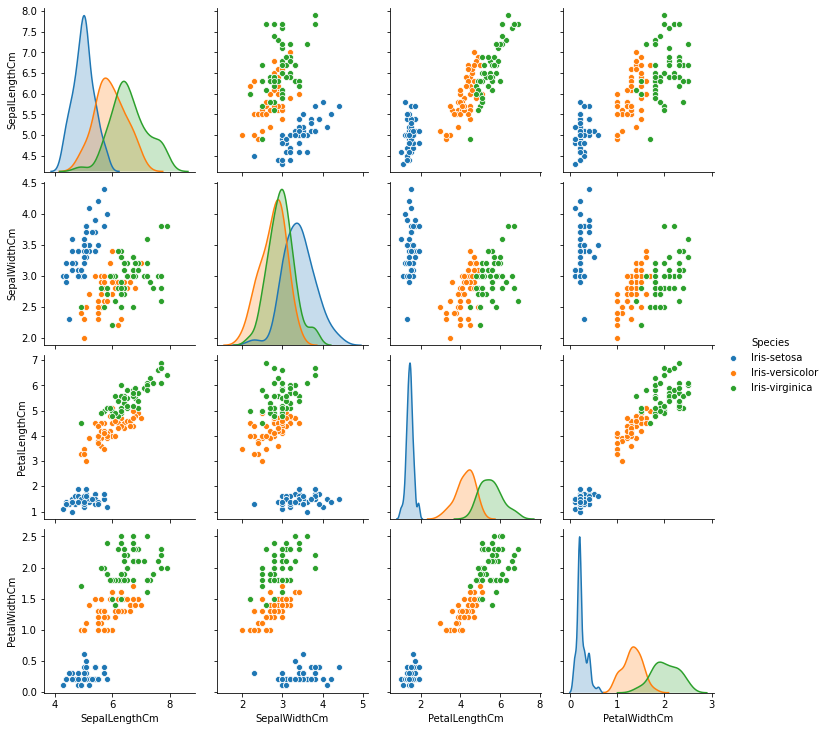

In [13]:
iris = iris.iloc[:, 1:]
sns.pairplot(iris, hue = 'Species')

### It can be seen that one species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.

# Now we create the model to predict the right class

# Importing the libraries

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier              # Defining the decision tree algorithm
from sklearn import tree

# Preparing the data

In [16]:
iris = datasets.load_iris()

# Splitting the data

In [17]:
X = iris.data
Y = iris.target

# Preprocessing the data

In [18]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.70, random_state = 1)

# Fitting the model

In [20]:
clf = DecisionTreeClassifier(random_state = 1234)
model = clf.fit(x_train, y_train)

In [21]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [22]:
prediction = clf.predict(x_test)

# Model Evaluation

In [24]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(clf, X, Y, cv = 3)
accuracy_scores

array([0.98, 0.94, 1.  ])

In [26]:
accuracy_scores.mean()

0.9733333333333333

In [27]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

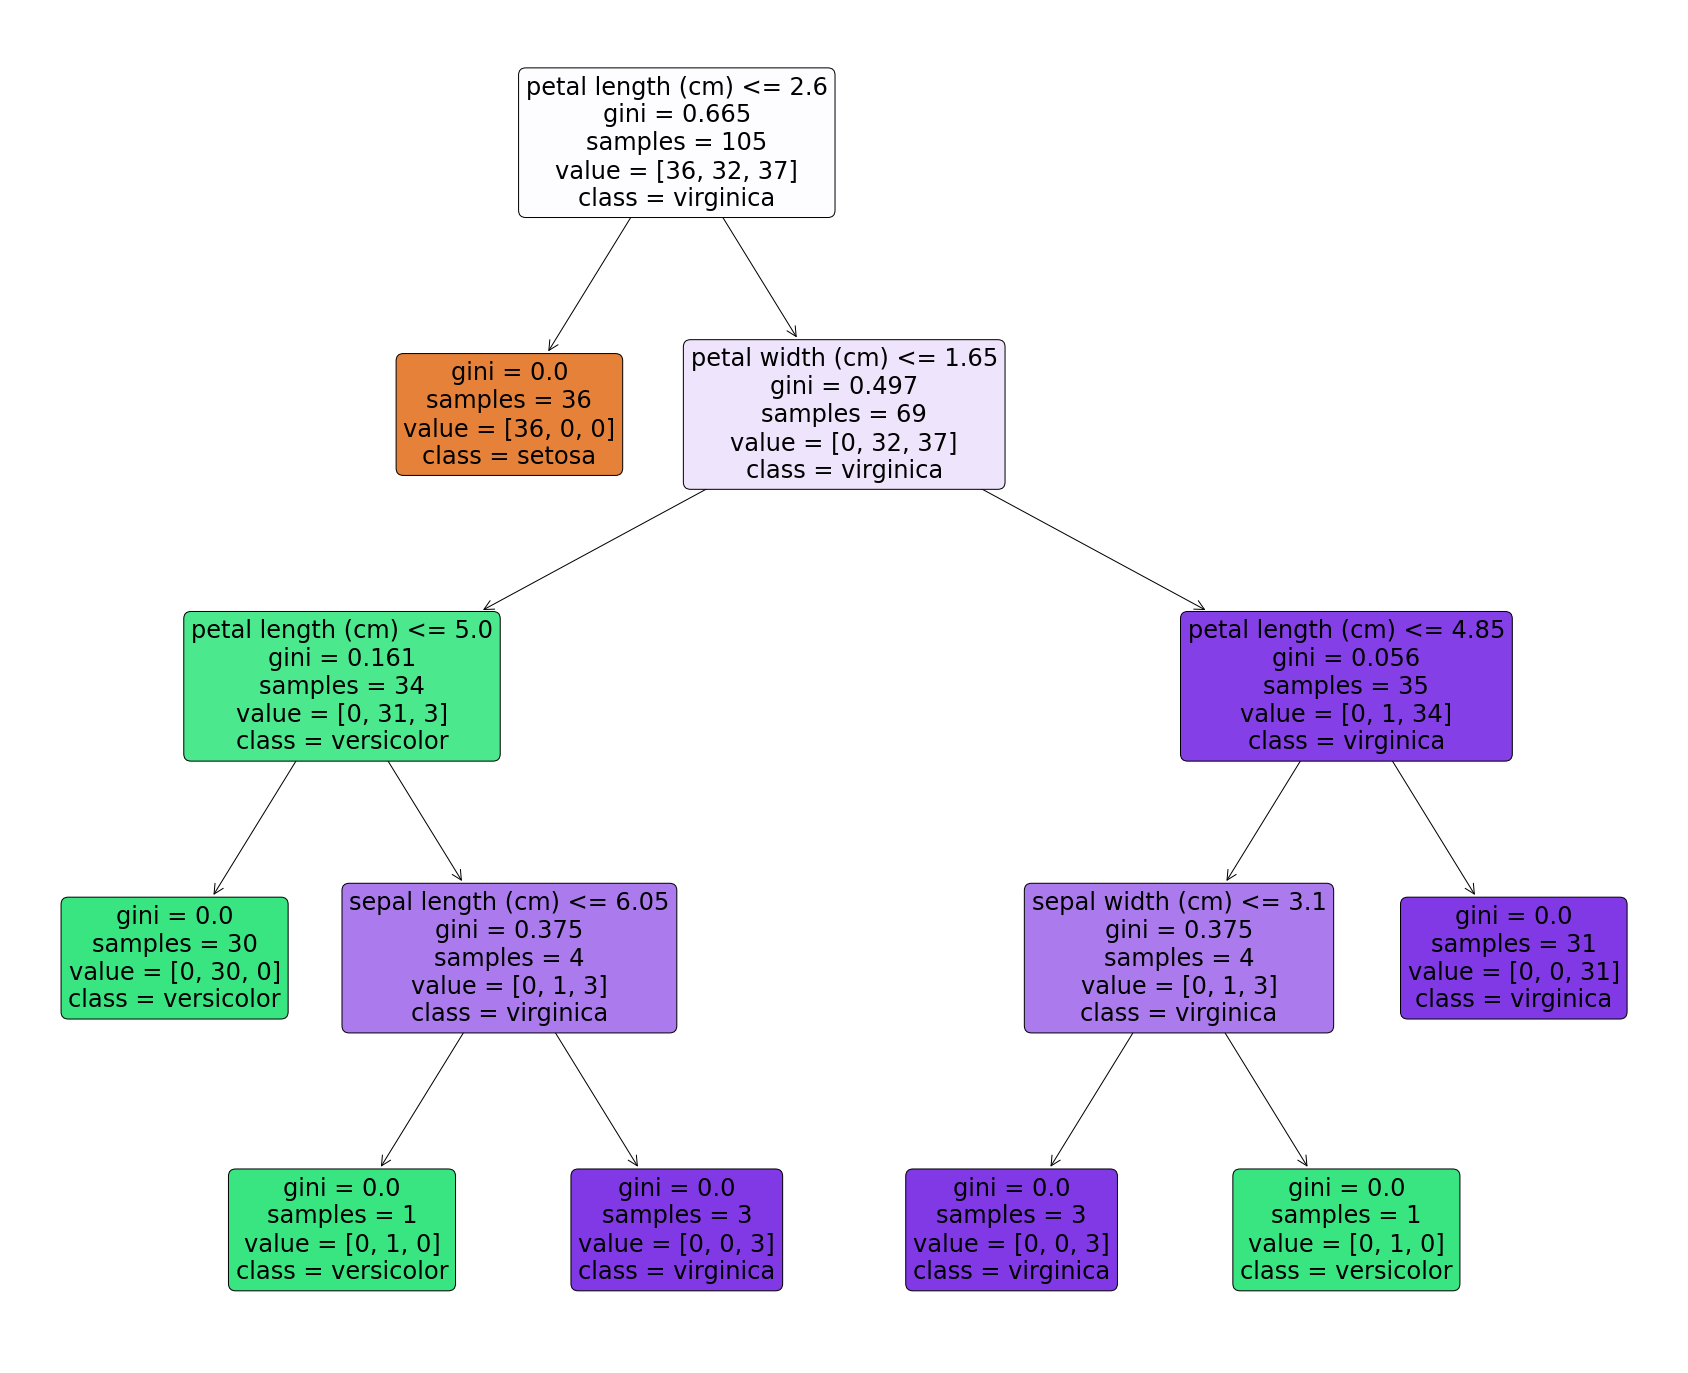

In [34]:
# Plotting the decision tree
fig = plt.figure(figsize = (30, 25))
_ = tree.plot_tree(clf,
                  feature_names = iris.feature_names,
                  class_names = iris.target_names,
                  filled = True, rounded = True)

# Conclusion

### In the case study, it has been observed that the model can predict the right class accordingly for new or test data with 97.33% accuracy (almost 98%). Out of 45 test observation we have correctly identified 44, so we can say that it is a good model for the prediction of the class based on the four parameters.